In [2]:
import helper_data_load as helper_load
import os
import helper_prediction_class as helper
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, kruskal
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt

# OS Paper Univariate Analysis
## Clinical Features

In [3]:
predictor = "os_days"
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local=True, predictor=predictor, classification=False, univar=True)

223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.
223 patients after drop NaN - CHUM.
162 patients after drop NaN - IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


In [4]:
data_norm_iucpq

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet_LLL_gldm_SmallDependenceEmphasis,wavelet_LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet_LLL_gldm_SmallDependenceLowGrayLevelEmphasis,os_days,age,smoking_habit,ecog_status,sex,first_line_io,histology_group
0,-0.393136,0.283262,0.336321,0.245215,0.189895,0.189035,0.189321,0.174989,-0.247881,0.139236,...,0.159905,1.068501,-0.185721,-1.180508,-0.137304,0.398815,1.776265,0.975606,-0.692550,-0.537043
1,0.828865,0.514652,-0.371046,-0.509350,-0.394987,-0.404016,-0.384007,-0.396816,-0.373009,-0.389273,...,-1.005882,-0.256738,-0.180957,-0.823333,1.753404,0.398815,0.358753,0.975606,-0.692550,-0.537043
2,0.253480,0.176341,-0.137651,-0.190067,-0.028457,-0.039617,-0.027296,-0.044071,-0.364417,-0.151735,...,0.802021,1.133791,-0.187822,-1.308725,-0.569502,0.398815,3.193777,-1.025004,-0.692550,-0.537043
3,0.842593,0.672671,1.258857,0.951152,0.982889,1.013922,0.982803,0.964501,0.975274,1.134368,...,-1.106082,0.457083,-0.201958,-0.635587,0.904687,0.398815,-1.058759,0.975606,-0.692550,-0.537043
4,-0.939443,-0.595030,0.427970,0.766062,0.671400,0.692028,0.675638,0.657732,-0.108802,0.470286,...,-0.629614,0.101537,-0.196170,-0.150194,0.180011,-1.501421,1.776265,0.975606,-0.692550,2.269440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-1.831888,-1.054257,-0.958150,-0.776524,-0.802110,-0.799463,-0.804681,-0.791615,-0.487101,-0.942236,...,1.103219,-0.510397,-0.105429,0.797695,-1.557936,-1.501421,-1.058759,0.975606,1.060467,-0.537043
158,1.098226,-0.674374,2.537750,3.370269,3.856646,3.602060,3.726719,3.819236,4.656323,3.792200,...,-1.917050,-0.840131,-0.203220,-1.233169,0.281019,-1.501421,0.358753,-1.025004,1.060467,-0.537043
159,-0.518182,-0.110921,1.548005,1.706226,1.641948,1.296889,1.647274,1.623764,1.007679,1.427725,...,-0.366128,0.928515,-0.201783,-1.311015,-0.032411,-1.501421,-1.058759,-1.025004,1.060467,2.269440
160,0.590184,0.142503,0.955901,0.930293,0.855116,0.884197,0.855423,0.834190,0.593542,1.041560,...,-1.696365,-0.942288,-0.205297,-0.892020,1.613269,0.398815,-1.058759,0.975606,-0.692550,-0.537043


In [6]:
# Check availability
clinical_features = ["age",	"smoking_habit", "ecog_status", "sex", "first_line_io", "histology_group"]

for feat in clinical_features:
    print("Chum: ", data_norm_chum[feat].isna().any().any())
    print("Iucpq: ", data_norm_iucpq[feat].isna().any().any())

Chum:  False
Iucpq:  False
Chum:  False
Iucpq:  False
Chum:  False
Iucpq:  False
Chum:  False
Iucpq:  False
Chum:  False
Iucpq:  False
Chum:  False
Iucpq:  False


In [5]:
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr

clinical_features = ["age",	"smoking_habit",	"ecog_status",	"sex",	"first_line_io",	"histology_group"]

col_names = ["feat", "corr", "p_val"]
clinical_stats_df = pd.DataFrame(columns=col_names)
for feat in clinical_features:
    corr, p = pearsonr(data_norm_chum[feat], data_norm_chum["os_days"])
    temp_list = [feat, corr, p]
    new_row = pd.DataFrame(dict(zip(col_names, temp_list)), index= [0])
    clinical_stats_df = pd.concat([clinical_stats_df, new_row])

p_val_arr = np.array(clinical_stats_df["p_val"])
print(p_val_arr)
reject, p_val_corrected = fdrcorrection(pvals=p_val_arr)
print(p_val_corrected)
clinical_stats_df["FDR_corr"] = p_val_corrected
clinical_stats_df["-log10(FDR)"] = -np.log10(p_val_corrected)

[7.42553843e-01 8.91943559e-01 1.43329437e-06 1.16048653e-01
 1.10409160e-02 3.30072135e-01]
[8.91064612e-01 8.91943559e-01 8.59976619e-06 2.32097306e-01
 3.31227481e-02 4.95108203e-01]


In [6]:
clinical_stats_df.round(5)

,feat,corr,p_val,FDR_corr,-log10(FDR)
0,age,-0.02212,0.74255,0.89106,0.05009
0,smoking_habit,0.00915,0.89194,0.89194,0.04966
0,ecog_status,-0.31625,0.00000,0.00001,5.06551
0,sex,-0.10554,0.11605,0.23210,0.63433
0,first_line_io,-0.16990,0.01104,0.03312,1.47987
0,histology_group,-0.06552,0.33007,0.49511,0.30530


## Radiomics features

In [7]:
def get_radiomics_feats(df, clinical_features):
    radiomics_features = list(df.columns)
    for feat in clinical_features:
        radiomics_features.remove(feat)
    radiomics_features.remove(predictor)
    return radiomics_features


### Pearson

In [19]:
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr
from scipy.stats import spearmanr
radiomics_features = get_radiomics_feats(data_norm_chum, clinical_features)
def get_p_values_per_radFeat(df):
    

    col_names = ["feat", "corr", "p_val"]
    radiomics_stats_df = pd.DataFrame(columns=col_names)
    for feat in radiomics_features:
        corr, p = pearsonr(df[feat], df["os_days"])
        temp_list = [feat, corr, p]
        new_row = pd.DataFrame(dict(zip(col_names, temp_list)), index= [0])
        radiomics_stats_df = pd.concat([radiomics_stats_df, new_row])

    p_val_arr = np.array(radiomics_stats_df["p_val"])
    #print(p_val_arr)
    reject, p_val_corrected = fdrcorrection(pvals=p_val_arr)
    #print(p_val_corrected)
    radiomics_stats_df["FDR_corr"] = p_val_corrected
    radiomics_stats_df["-log10(FDR)"] = -np.log10(p_val_corrected)
    return radiomics_stats_df

radiomics_stats_df_chum = get_p_values_per_radFeat(data_norm_chum)
radiomics_stats_df_iucpq = get_p_values_per_radFeat(data_norm_iucpq)

In [20]:
radiomics_stats_df_chum
radiomics_stats_df_iucpq

,feat,corr,p_val,FDR_corr,-log10(FDR)
0,original_shape_Elongation,-0.181332,0.020928,0.065236,1.185512
0,original_shape_Flatness,-0.228129,0.003503,0.022416,1.649436
0,original_shape_LeastAxisLength,-0.234673,0.002648,0.020547,1.687259
0,original_shape_MajorAxisLength,-0.206982,0.008224,0.035951,1.444286
0,original_shape_Maximum2DDiameterColumn,-0.229182,0.003351,0.022375,1.650229
...,...,...,...,...,...
0,wavelet_LLL_gldm_LargeDependenceLowGrayLevelEm...,0.001996,0.979893,0.981046,0.008311
0,wavelet_LLL_gldm_LowGrayLevelEmphasis,0.113731,0.149575,0.249585,0.602782
0,wavelet_LLL_gldm_SmallDependenceEmphasis,0.222073,0.004509,0.024851,1.604655
0,wavelet_LLL_gldm_SmallDependenceHighGrayLevelE...,0.014410,0.855582,0.891187,0.050031


In [21]:
def check_significant_feats(radiomics_stats_df):
    print("{} features have a corrected p value smaller than 0.05".format(len(radiomics_stats_df[radiomics_stats_df.FDR_corr < 0.05])))
    print("Min corrected p value: ")
    print(radiomics_stats_df["FDR_corr"].min())
    print("max corrected p value: ")
    print(radiomics_stats_df["FDR_corr"].max())

    print("Minimal corr:")
    display(radiomics_stats_df[radiomics_stats_df["corr"] == radiomics_stats_df["corr"].min()])
    print("Maximal corr:")
    display(radiomics_stats_df[radiomics_stats_df["corr"] == radiomics_stats_df["corr"].max()])
    print("Number of positive correlated feats: ")
    print(len(radiomics_stats_df[radiomics_stats_df["corr"]>0]))
    print("Number of negative correlated feats: ")
    print(len(radiomics_stats_df[radiomics_stats_df["corr"]<0]))
    print("Number of 0 correlated feats: ")
    print(len(radiomics_stats_df[radiomics_stats_df["corr"] == 0]))
    print("Average")
    print(radiomics_stats_df["corr"].mean().round(3))

print("CHUM")
check_significant_feats(radiomics_stats_df_chum)
print("IUCPQ")
check_significant_feats(radiomics_stats_df_iucpq)

CHUM
0 features have a corrected p value smaller than 0.05
Min corrected p value: 
0.562857811331544
max corrected p value: 
0.9995019201263645
Minimal corr:


,feat,corr,p_val,FDR_corr,-log10(FDR)
0,wavelet_LLH_glcm_Idmn,-0.163734,0.01437,0.562858,0.249601


Maximal corr:


,feat,corr,p_val,FDR_corr,-log10(FDR)
0,wavelet_LLH_glcm_DifferenceAverage,0.194937,0.003469,0.562858,0.249601


Number of positive correlated feats: 
307
Number of negative correlated feats: 
544
Number of 0 correlated feats: 
0
Average
-0.019
IUCPQ
220 features have a corrected p value smaller than 0.05
Min corrected p value: 
0.005241143583371644
max corrected p value: 
0.9811282176433626
Minimal corr:


,feat,corr,p_val,FDR_corr,-log10(FDR)
0,wavelet_HHL_glrlm_RunVariance,-0.318937,0.000035,0.005241,2.280574


Maximal corr:


,feat,corr,p_val,FDR_corr,-log10(FDR)
0,wavelet_HLL_glrlm_RunPercentage,0.308673,0.000064,0.005241,2.280574


Number of positive correlated feats: 
345
Number of negative correlated feats: 
506
Number of 0 correlated feats: 
0
Average
-0.031


In [28]:
radiomics_stats_df_iucpq["signi"] = "blue"
radiomics_stats_df_iucpq["signi"][radiomics_stats_df_iucpq["FDR_corr"] <0.05] = "red"

/var/folders/km/l90xp47s19v3fplyb1b0bc480000gp/T/ipykernel_60241/2265718269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radiomics_stats_df_iucpq["signi"][radiomics_stats_df_iucpq["FDR_corr"] <0.05] = "red"


In [29]:
radiomics_stats_df_iucpq

,feat,corr,p_val,FDR_corr,-log10(FDR),feat_nr,signi
0,original_shape_Elongation,-0.181332,0.020928,0.065236,1.185512,0,blue
0,original_shape_Flatness,-0.228129,0.003503,0.022416,1.649436,1,red
0,original_shape_LeastAxisLength,-0.234673,0.002648,0.020547,1.687259,2,red
0,original_shape_MajorAxisLength,-0.206982,0.008224,0.035951,1.444286,3,red
0,original_shape_Maximum2DDiameterColumn,-0.229182,0.003351,0.022375,1.650229,4,red
...,...,...,...,...,...,...,...
0,wavelet_LLL_gldm_LargeDependenceLowGrayLevelEm...,0.001996,0.979893,0.981046,0.008311,846,blue
0,wavelet_LLL_gldm_LowGrayLevelEmphasis,0.113731,0.149575,0.249585,0.602782,847,blue
0,wavelet_LLL_gldm_SmallDependenceEmphasis,0.222073,0.004509,0.024851,1.604655,848,red
0,wavelet_LLL_gldm_SmallDependenceHighGrayLevelE...,0.014410,0.855582,0.891187,0.050031,849,blue


In [22]:
textures = ["glcm", "glszm", "glrlm", "ngtdm", "gldm"]
shape = []
firstorder = []
texture = []
wavelet = []

for feature in radiomics_features:
    if "shape" in feature:
        shape.append(feature)
    elif "firstorder" in feature:
        firstorder.append(feature)
    for text in textures:
        if text in feature:
            texture.append(feature)
#    else:
#        wavelet.append(feature)
print("Original Shape Features: ", len(shape))
print("Original Firstorder Features: ", len(firstorder))
print("Original Texture Features: ", len(texture))
print("Wavelet Features: ", len(wavelet))

Original Shape Features:  14
Original Firstorder Features:  162
Original Texture Features:  675
Wavelet Features:  0


In [24]:
def prep_for_group_plot(radiomics_stats_df): 
    radiomics_stats_df["group"] = "none"
    radiomics_stats_df["group"][radiomics_stats_df.feat.isin(shape)] = "Shape"
    radiomics_stats_df["group"][radiomics_stats_df.feat.isin(firstorder)] = "Firstorder"
    radiomics_stats_df["group"][radiomics_stats_df.feat.isin(texture)] = "Texture"

    colors = {'Shape':'red', 'Firstorder':'green', 'Texture':'blue'}
    radiomics_stats_df["color"] = radiomics_stats_df.group.map(colors)
    return radiomics_stats_df


#### CHUM

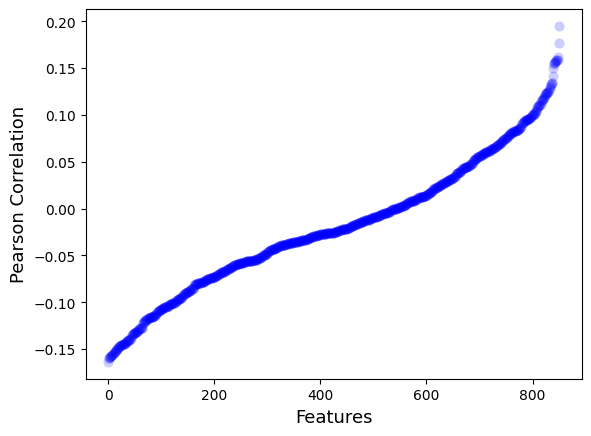

In [27]:
#radiomics_stats_df.plot.scatter(x="feat", y= "corr", c="color", label="group")
radiomics_sorted_chum = radiomics_stats_df_chum.sort_values(by="corr")
radiomics_sorted_chum["feat_nr"] = range(len(radiomics_sorted_chum))
radiomics_stats_df_chum["feat_nr"] = range(len(radiomics_stats_df_chum))
fig, ax = plt.subplots()

x = radiomics_sorted_chum["feat_nr"]
y = radiomics_sorted_chum["corr"]

ax.scatter(x, y,  s=50, linewidth=0.1,  alpha=.2, c="blue")
ax.set_ylabel("Pearson Correlation", fontsize=13)
ax.set_xlabel("Features", fontsize=13)
plt.savefig("../../Plots/radiomics_CHUM_corr_os.png", dpi=120)
#plt.legend()

#### IUCPQ

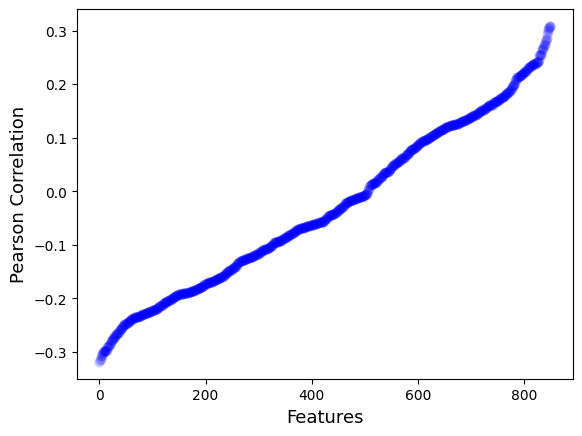

In [26]:
#radiomics_stats_df.plot.scatter(x="feat", y= "corr", c="color", label="group")
radiomics_sorted_iucpq = radiomics_stats_df_iucpq.sort_values(by="corr")
radiomics_sorted_iucpq["feat_nr"] = range(len(radiomics_sorted_iucpq))
radiomics_stats_df_iucpq["feat_nr"] = range(len(radiomics_stats_df_iucpq))
fig, ax = plt.subplots()

x = radiomics_sorted_iucpq["feat_nr"]
y = radiomics_sorted_iucpq["corr"]

ax.scatter(x, y,  s=50, linewidth=0.1,  alpha=.2, c="blue")
ax.set_ylabel("Pearson Correlation", fontsize=13)
ax.set_xlabel("Features", fontsize=13)
plt.savefig("../../Plots/radiomics_IUCPQ_corr_os.png", dpi=120)
#plt.legend()

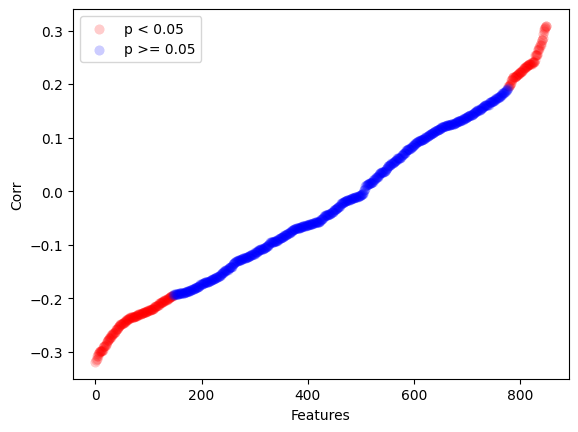

In [32]:
### IUCPQ with p value colored
radiomics_sorted_iucpq = radiomics_stats_df_iucpq.sort_values(by="corr")
radiomics_sorted_iucpq["feat_nr"] = range(len(radiomics_sorted_iucpq))
radiomics_stats_df_iucpq["feat_nr"] = range(len(radiomics_stats_df_iucpq))
fig, ax = plt.subplots()
for group in radiomics_sorted_iucpq.signi.unique():
    radiomics_stats_temp = radiomics_sorted_iucpq[radiomics_sorted_iucpq["signi"] == group]
    x = radiomics_stats_temp["feat_nr"]
    y = radiomics_stats_temp["corr"]
    if group == "red": l = "p < 0.05"
    elif group == "blue": l = "p >= 0.05"
    c = radiomics_stats_temp["signi"].iloc[0]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c, alpha=.2)
    ax.set_ylabel("Corr")
    ax.set_xlabel("Features")
plt.legend()

#### Both cohorts

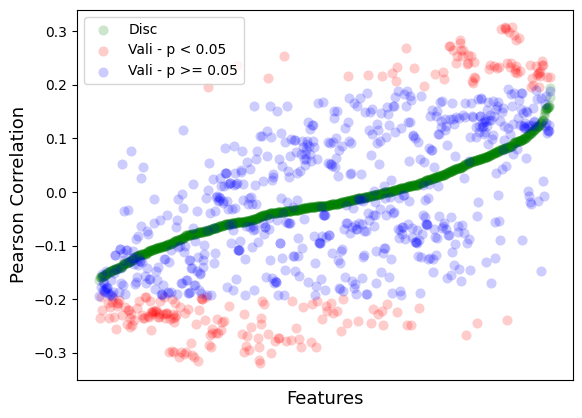

In [40]:
radiomics_sorted_chum = radiomics_stats_df_chum.sort_values(by="corr")
#radiomics_sorted_iucpq = radiomics_stats_df_iucpq.sort_values(by="corr")
radiomics_sorted_chum["feat_nr"] = range(len(radiomics_stats_df_chum))

fig, ax = plt.subplots()

x = radiomics_sorted_chum["feat"]
y = radiomics_sorted_chum["corr"]
ax.scatter(x, y,  s=50, linewidth=0.1,  alpha=.2, c="green",  label="Disc")
for group in radiomics_sorted_iucpq.signi.unique():
    radiomics_stats_temp = radiomics_sorted_iucpq[radiomics_sorted_iucpq["signi"] == group]
    x_iucpq = radiomics_stats_temp["feat"]
    y_iucpq = radiomics_stats_temp["corr"]
    if group == "red": l = "Vali - p < 0.05"
    elif group == "blue": l = "Vali - p >= 0.05"
    c = radiomics_stats_temp["signi"].iloc[0]

    ax.scatter(x_iucpq, y_iucpq, label=l, s=50, linewidth=0.1, c=c, alpha=.2)

#x_iucpq = radiomics_stats_df_iucpq["feat"]
#y_iucpq = radiomics_stats_df_iucpq["corr"]
#ax.scatter(x_iucpq, y_iucpq,  s=50, linewidth=0.1,  alpha=.2, c="red")


ax.set_ylabel("Pearson Correlation", fontsize=13)
ax.set_xlabel("Features", fontsize=13)
plt.xticks([])
plt.legend()

#### Colored-grouped plot

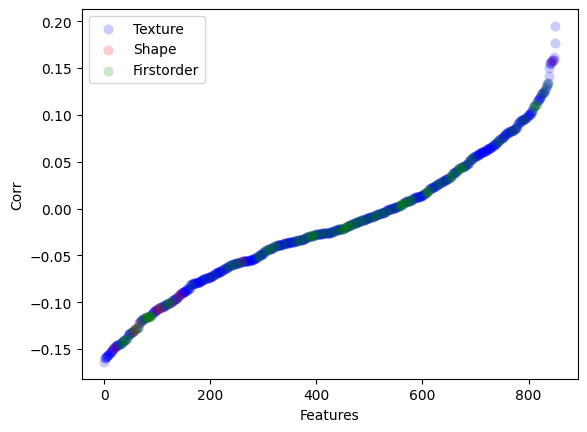

In [15]:
### COLoRe FOR GROUPS
#radiomics_stats_df.plot.scatter(x="feat", y= "corr", c="color", label="group")
radiomics_sorted = radiomics_stats_df.sort_values(by="corr")
radiomics_sorted["feat_nr"] = range(len(radiomics_sorted))
radiomics_stats_df["feat_nr"] = range(len(radiomics_stats_df))
fig, ax = plt.subplots()
for group in radiomics_sorted.group.unique():
    radiomics_stats_temp = radiomics_sorted[radiomics_sorted["group"] == group]
    x = radiomics_stats_temp["feat_nr"]
    y = radiomics_stats_temp["corr"]
    l = group
    c = radiomics_stats_temp["color"].iloc[0]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c, alpha=.2)
    ax.set_ylabel("Corr")
    ax.set_xlabel("Features")
plt.legend()

### Spearman

In [ ]:
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import spearmanr

radiomics_features = get_radiomics_feats(data_norm_chum, clinical_features)

col_names = ["feat", "corr", "p_val"]
radiomics_stats_df = pd.DataFrame(columns=col_names)
for feat in radiomics_features:
    corr, p = spearmanr(data_norm_chum[feat], data_norm_chum["os_days"])
    temp_list = [feat, corr, p]
    new_row = pd.DataFrame(dict(zip(col_names, temp_list)), index= [0])
    radiomics_stats_df = pd.concat([radiomics_stats_df, new_row])

p_val_arr = np.array(radiomics_stats_df["p_val"])
#print(p_val_arr)
reject, p_val_corrected = fdrcorrection(pvals=p_val_arr)
#print(p_val_corrected)
radiomics_stats_df["FDR_corr"] = p_val_corrected
radiomics_stats_df["-log10(FDR)"] = -np.log10(p_val_corrected)
radiomics_stats_df

print("{} features have a corrected p value smaller than 0.05".format(len(radiomics_stats_df[radiomics_stats_df.FDR_corr < 0.05])))
print(radiomics_stats_df["FDR_corr"].min())
print(radiomics_stats_df["FDR_corr"].max())

In [ ]:
radiomics_stats_df["group"] = "none"
radiomics_stats_df["group"][radiomics_stats_df.feat.isin(shape)] = "Shape"
radiomics_stats_df["group"][radiomics_stats_df.feat.isin(firstorder)] = "Firstorder"
radiomics_stats_df["group"][radiomics_stats_df.feat.isin(texture)] = "Texture"

colors = {'Shape':'red', 'Firstorder':'green', 'Texture':'blue'}
radiomics_stats_df["color"] = radiomics_stats_df.group.map(colors)

In [ ]:
#radiomics_stats_df.plot.scatter(x="feat", y= "corr", c="color", label="group")
radiomics_sorted = radiomics_stats_df.sort_values(by="corr")
radiomics_sorted["feat_nr"] = range(len(radiomics_sorted))
radiomics_stats_df["feat_nr"] = range(len(radiomics_stats_df))
fig, ax = plt.subplots()
for group in radiomics_stats_df.group.unique():
    radiomics_stats_temp = radiomics_stats_df[radiomics_stats_df["group"] == group]
    x = radiomics_stats_temp["feat_nr"]
    y = radiomics_stats_temp["corr"]
    l = group
    c = radiomics_stats_temp["color"].iloc[0]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c, alpha=.2)
    ax.set_ylabel("Corr")
    ax.set_xlabel("Features")
plt.legend()

## Multivariate analysis Clinical

In [ ]:
def get_p_values_multi(df, features):
    
    X = sm.add_constant(df[features])
    y = df.os_days
    mod = sm.OLS(y, X)
    p_temp = mod.fit().pvalues
    p_values_multi = pd.DataFrame(p_temp.round(5))
    p_val_arr = np.array(p_values_multi[0])
    reject, p_val_corrected = fdrcorrection(pvals=p_val_arr)
    p_values_multi["FDR_corr"] = p_val_corrected
    p_values_multi["-log10(FDR)"] = -np.log10(p_val_corrected)

    return p_values_multi

list_clin_feats = ["age", "smoking_habit", "ecog_status","sex"]#"age",, "first_line_io", "histology_group"

p_multi_clinical_df = get_p_values_multi(data_norm_chum, list_clin_feats)
#p_multi_radiomics_df = get_p_values_multi(data_norm_chum, radiomics_features)

p_multi_clinical_df.round(5)

In [ ]:
p_multi_clinical_df

# T-Test for OS of both cohorts

In [58]:
os_chum_or = pd.read_csv("../../Data/Discovery-ClinicalData.csv")
os_iucpq_or = pd.read_csv("../../Data/ValidationClinicalData.csv")

os_chum_or = os_chum_or["os_days"]
os_iucpq_or = os_iucpq_or["os_days"]

In [41]:
os_chum = data_norm_chum.os_days
os_iucpq = data_norm_iucpq.os_days

<AxesSubplot: >

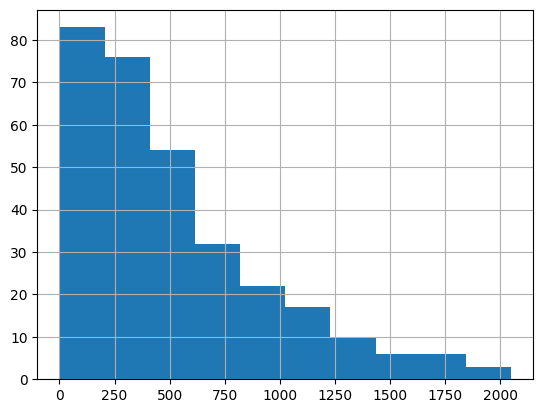

In [59]:
os_chum_or.sort_values().reset_index(drop=True).hist()

<AxesSubplot: >

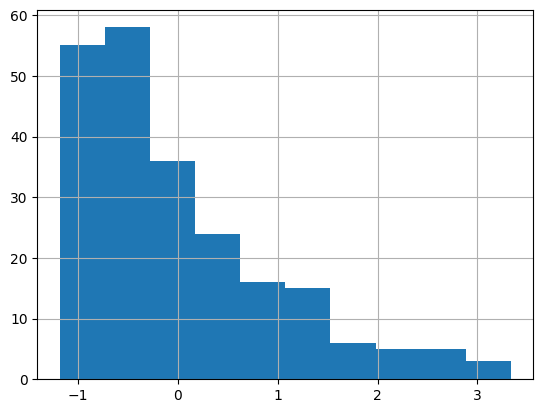

In [53]:
os_chum.sort_values().reset_index(drop=True).hist()

<AxesSubplot: >

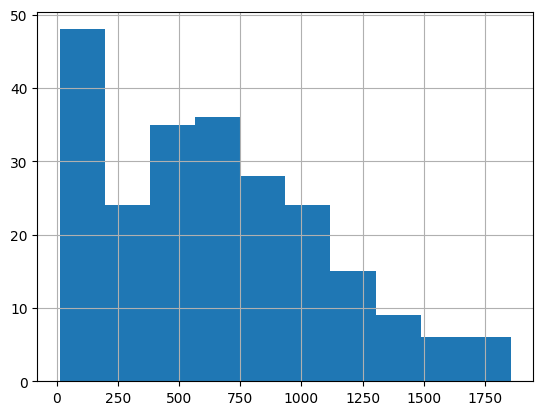

In [60]:
os_iucpq_or.sort_values().reset_index(drop=True).hist()

<AxesSubplot: >

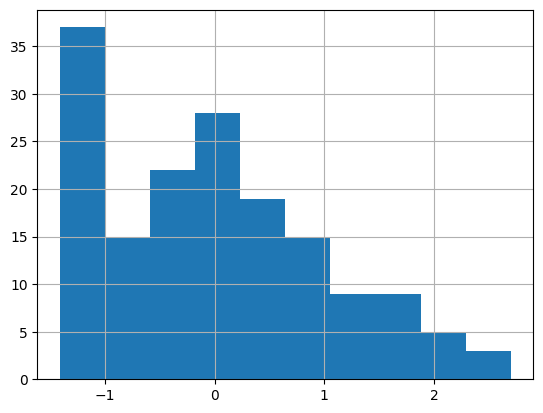

In [54]:
os_iucpq.sort_values().reset_index(drop=True).hist()

In [61]:
print("Var CHUM: ",os_chum.var())
print("Var IUCPQ: ",os_iucpq.var())
print("Var CHUM: ",os_chum_or.var())
print("Var IUCPQ: ",os_iucpq_or.var())

Var CHUM:  1.0045045045045047
Var IUCPQ:  1.0062111801242233
Var CHUM:  189524.03570377844
Var IUCPQ:  195038.2435911914


In [64]:
from scipy import stats as st
a = os_chum.to_numpy()
a_or = os_chum_or.to_numpy()
b = os_iucpq.to_numpy()
b_or = os_iucpq_or.to_numpy()

print("normalized ")
print(st.ttest_ind(a=a, b=b, equal_var=True))
print(st.ttest_ind(a=a, b=b, equal_var=False))
print("original")
print(st.ttest_ind(a=a_or, b=b_or, equal_var=True))
print(st.ttest_ind(a=a_or, b=b_or, equal_var=False))

normalized 
Ttest_indResult(statistic=-9.195007902049543e-16, pvalue=0.9999999999999993)
Ttest_indResult(statistic=-9.193768178480122e-16, pvalue=0.9999999999999993)
original
Ttest_indResult(statistic=-3.4679219502827556, pvalue=0.0005664849713872464)
Ttest_indResult(statistic=-3.460733340934834, pvalue=0.0005856160241060744)


In [67]:
from scipy.stats import mannwhitneyu
res = mannwhitneyu(a_or, b_or)
res2 = mannwhitneyu(b_or, a_or)
print(res.statistic, res.pvalue)
print(res2.statistic, res2.pvalue)


28750.5 0.00010978411037047848
42628.5 0.00010978411037047848


# Older Analysis

In [ ]:
data_norm_iucpq.corr("pearson")["os_days"][:-7].sort_values()#.reset_index(drop=True)

In [ ]:
corrs_iucpq = data_norm_iucpq.corr("pearson")["os_days"][:-7].reset_index(drop=True)
corrs_chum = data_norm_chum.corr("pearson")["os_days"][:-7].reset_index(drop=True)


In [ ]:

corr_iucpq_df = pd.DataFrame(corrs_iucpq.sort_values().reset_index(drop=True)).reset_index()
corr_chum_df = pd.DataFrame(corrs_chum.sort_values().reset_index(drop=True)).reset_index()
ax=corr_iucpq_df.plot.scatter(x="index", y="os_days", label="IUCPQ", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="blue")
ax2=corr_chum_df.plot.scatter(x="index", y="os_days", label="CHUM", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="red", ax=ax)
plt.show()

In [ ]:
df_both = pd.DataFrame( columns=["IUCPQ", "CHUM"])

In [ ]:
df_both["IUCPQ"] = corrs_iucpq
df_both["CHUM"] = corrs_chum


In [ ]:
sort_IUCPQ = df_both.sort_values(by="IUCPQ")#
sort_IUCPQ["Features"] = range(len(sort_IUCPQ))
ax = sort_IUCPQ.plot(kind="scatter", y="IUCPQ", x="Features", label="IUCPQ", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="blue")
sort_IUCPQ.plot(kind="scatter", y="CHUM", x="Features", label="CHUM", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="red", ax =ax)

In [ ]:
sort_CHUM = df_both.sort_values(by="CHUM")#
sort_CHUM["Features"] = range(len(sort_CHUM))
ax = sort_CHUM.plot(kind="scatter", y="IUCPQ", x="Features", label="IUCPQ", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="blue")
sort_CHUM.plot(kind="scatter", y="CHUM", x="Features", label="CHUM", xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days",edgecolors='darkblue', alpha=0.08, color="red", ax =ax)

In [ ]:
corr_df

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(corr_df, alpha=0.03)


In [ ]:
corr_df = pd.DataFrame(corrs.sort_values().reset_index(drop=True))
corr_df

In [ ]:
corrs.sort_values().reset_index(drop=True).plot( xlabel="Features", ylabel="Pearson Correlation", title="Correlation to os days", marker='.', linestyle='none')


In [ ]:
corrs.sort_values().reset_index(drop=True).hist()

# Univariate Analysis of clinical Features

In [ ]:
clinical_chum = pd.read_csv("../../Data/clinical_CHUM.csv")
clinical_iucpq = pd.read_csv("../../Data/clinical_IUCPQ.csv")
clinical_chum.drop(columns="Unnamed: 0", inplace=True)
clinical_iucpq.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
clinical_iucpq.corr("pearson")["os_days"].loc["age"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lifelines.utils import concordance_index

In [ ]:

def get_pred_c(df, feat=None):
    SEED=42
    if feat != None: # univariate
        X = df[[feat]]
        X_chum = data_norm_chum[[feat]]
    else: # multivariate
        X = df[["age", "smoking_habit", "ecog_status","sex", "first_line_io", "histology_group"]]
        X_chum = data_norm_chum[["age", "smoking_habit", "ecog_status","sex", "first_line_io", "histology_group"]]
    y = df["os_days"]
    y_chum = data_norm_chum["os_days"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred_CHUM = regressor.predict(X_chum)
    df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
    df_preds_chum = pd.DataFrame({"chum_act": y_chum.squeeze(), "chum_pred": y_pred_CHUM.squeeze()})
    c_idx = concordance_index(df_preds.Actual, df_preds.Predicted)
    c_idx_chum = concordance_index(df_preds_chum.chum_act, df_preds_chum.chum_pred)
    print("Feature: {}, c-idx: {}, c-idx chum: {}".format(feat, c_idx, c_idx_chum))
    return df_preds

iucpq_pred_df = get_pred_c(data_norm_iucpq)




In [ ]:
featre_list = ["age", "smoking_habit", "ecog_status","sex", "first_line_io", "histology_group"]
for feat in featre_list:    
    iucpq_pred_df = get_pred_c(data_norm_iucpq, feat)

In [ ]:
concordance_index(iucpq_pred_df.Actual, iucpq_pred_df.Predicted)

In [ ]:
data_norm_iucpq

In [ ]:
def get_p_values(df):
    list_clin_feats = ["age", "smoking_habit", "ecog_status","sex", "first_line_io", "histology_group"]#"age",
    df_p_values = pd.DataFrame(columns=["Feature", "p-Value"])
    for x_col in list_clin_feats:
        print(x_col)
        X = sm.add_constant(df[x_col])
        y = df.os_days
        # Fit and summarize OLS model
        mod = sm.OLS(y, X)
        res = mod.fit()
        
        p_temp = mod.fit().pvalues.loc[x_col]
        new_row = pd.DataFrame({"Feature": x_col, "p-Value":p_temp}, index=[0])
        df_p_values = pd.concat([df_p_values, new_row])
        #print(res.summary())

        # scatter-plot data
        ax = df.plot(x=x_col, y='os_days', kind='scatter')
        # plot regression line
        abline_plot(model_results=mod.fit(), ax=ax)
        plt.show()
    return df_p_values


In [ ]:
#clinical_iucpq_cat = load_helper.make_cat_to_int(clinical_iucpq)
df_p_values_iucpq = get_p_values(data_norm_iucpq) 

#clinical_CHUM_cat = make_cat_to_int(clinical_chum)
df_p_values_CHUM = get_p_values(data_norm_chum)

In [ ]:
df_p_values_CHUM.round(5)

In [ ]:
df_p_values_CHUM.round(5)

In [ ]:
df_p_values_CHUM["p-Value"].round(5)

In [ ]:
df_p_values_iucpq

In [ ]:
df_p_values_iucpq

# Multivariate Prediction with clinical Data

In [ ]:
def get_p_values_multi(df):
    list_clin_feats = ["age", "smoking_habit", "ecog_status","sex", "first_line_io", "histology_group"]#"age",
    df_p_values = pd.DataFrame(columns=["Feature", "p-Value"])
    
    X = sm.add_constant(df[list_clin_feats])
    y = df.os_days
    # Fit and summarize OLS model
    mod = sm.OLS(y, X)
    res = mod.fit()
    #p_temp = mod.fit().pvalues.loc[x_col]
    #new_row = pd.DataFrame({"Feature": x_col, "p-Value":p_temp}, index=[0])
    #df_p_values = pd.concat([df_p_values, new_row])
    print(res.summary())

    # scatter-plot data
    #ax = df.plot(x=x_col, y='os_days', kind='scatter')
    # plot regression line
    #abline_plot(model_results=mod.fit(), ax=ax)
    #plt.show()
    #return df_p_values

In [ ]:
get_p_values_multi(data_norm_iucpq)

In [ ]:
get_p_values_multi(clinical_CHUM_cat)

In [ ]:
from scipy.stats import mannwhitneyu


In [ ]:
mannwhitneyu(clinical_iucpq_col.os_days[clinical_iucpq_col.sex==0], clinical_iucpq_col.os_days[clinical_iucpq_col.sex==1])

In [ ]:
clinical_iucpq_col.os_days[clinical_iucpq_col.sex==0]

In [ ]:
clinical_iucpq_col.os_days

In [ ]:
clinical_iucpq_col.sex

In [ ]:
clinical_iucpq_col.sex[clinical_iucpq_col.sex==0]

In [ ]:
wilcoxon(x=clinical_iucpq_col.sex[clinical_iucpq_col.sex==0], y=clinical_iucpq_col.sex[clinical_iucpq_col.sex==1])

In [ ]:
kruskal(clinical_iucpq_col.os_days, clinical_iucpq_col.smoking_habit)

In [ ]:
kruskal(clinical_iucpq_col.os_days, clinical_iucpq_col.ecog_status)

In [ ]:
clinical_iucpq['sex_id'] = clinical_iucpq.sex.cat.codes

In [ ]:
clinical_iucpq.ecog_status

# Univariate Classification Logistic regression

In [68]:
path='../../Data/'

ch_cl=pd.read_csv(path+'clinical_CHUM.csv')
chum=pd.read_csv(path+'PyRads_CHUM.csv')

new_d=pd.merge(ch_cl,chum, on='oncotech_id')

a=new_d.os_days.quantile(0.333)
b=new_d.os_days.quantile(0.666)
c=new_d.os_days.quantile(0.666)
print("Q1 quantile: ", new_d.os_days.quantile(0.33))
print("Q2 quantile: ", new_d.os_days.quantile(0.66))
print("Q3 quantile: ", new_d.os_days.quantile(0.66))
print(a,b,c)

df1=new_d[new_d.os_days<=a].reset_index()
df2=new_d[(new_d.os_days>a) & (new_d.os_days<=b)].reset_index()
df3=new_d[new_d.os_days>=b].reset_index()

print(len(df1), len(df3))

Q1 quantile:  280.78000000000003
Q2 quantile:  594.1200000000001
Q3 quantile:  594.1200000000001
282.778 602.964 602.964
74 75


In [70]:
column_name='class_os_days'
#with open(rad_path_chum+"feature_radimics.json", "r") as fp:
#    feature_name = json.load(fp)

radomics_first = df1
radomics_second = df3
radomics_first[column_name] = 0
radomics_second[column_name] = 1
radomics_chum = pd.concat([radomics_first, radomics_second], ignore_index=True)

In [71]:
radomics_chum

,index,Unnamed: 0_x,oncotech_id,center,sex,dob,age,weight,height,bmi,...,wavelet.LLL_gldm_GrayLevelVariance,wavelet.LLL_gldm_HighGrayLevelEmphasis,wavelet.LLL_gldm_LargeDependenceEmphasis,wavelet.LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet.LLL_gldm_LowGrayLevelEmphasis,wavelet.LLL_gldm_SmallDependenceEmphasis,wavelet.LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmphasis,class_os_days
0,2,4,004-CHUM,CHUM,Female,1950-06-17,67.964,86.0,165,31.589,...,388.436840,2035.413453,2.804484,7829.888789,0.003951,0.002591,0.722976,1329.528189,0.002349,0
1,5,7,007-CHUM,CHUM,Female,1965-05-15,53.060,46.9,157,19.027,...,149.038674,4266.465444,9.333112,41475.318012,0.002318,0.000386,0.396908,1568.787144,0.000240,0
2,10,13,014-CHUM,CHUM,Male,1951-07-29,64.753,60.0,163,22.583,...,320.893048,5724.947729,4.176503,24157.323948,0.000864,0.000265,0.602162,3420.626325,0.000188,0
3,11,15,016-CHUM,CHUM,Male,1940-11-26,76.879,68.5,173,22.888,...,405.219567,6260.377085,5.117920,31351.203656,0.000972,0.000265,0.555148,3548.994970,0.000186,0
4,13,17,018-CHUM,CHUM,Male,1942-01-13,76.027,73.0,179,22.783,...,31.089032,1307.761256,45.269565,59777.593353,0.035148,0.001066,0.113611,143.450382,0.000345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,174,226,232-CHUM,CHUM,Male,1942-09-21,76.460,67.2,157,27.263,...,91.096662,2558.456603,12.059109,32951.808124,0.004862,0.000700,0.338935,771.274597,0.000432,1
145,175,227,233-CHUM,CHUM,Male,1949-09-05,68.903,70.2,175,22.922,...,352.830140,5123.056023,7.828809,49887.456459,0.001562,0.000424,0.516803,2131.434951,0.000326,1
146,176,228,234-CHUM,CHUM,Male,1947-09-27,69.503,69.0,169,24.159,...,2146.265732,10557.906894,8.372493,67804.689395,0.001262,0.000184,0.423935,5696.242197,0.000100,1
147,177,229,235-CHUM,CHUM,Male,1950-10-03,67.737,86.0,181,26.251,...,223.935691,6150.061326,13.001682,84144.353047,0.002288,0.000277,0.362771,2060.156474,0.000165,1
